## **Data Analytics HW#5**
* **學號：R10546001**
* **姓名：許世佑**

### **Q1 (a)**

In [41]:
from PIL import Image
import numpy as np
from numpy import array
from tkinter import _flatten
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import math
import matplotlib.pyplot as plt

In [42]:
X = np.zeros((400, 2576))
for j in range(0, 40):
    for i in range(0, 10):
        image = Image.open(r"/Users/4yo/Desktop/NTU_Class/Data_Analyze_Method/ORL_Faces/%s_%s.png" %(j+1, i+1))
        image_array = array(image)
        X[i+j*10] = image_array.flatten()
        y = [10*[0],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[0],10*[1],10*[0]
         ,10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]
         ,10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]
         ,10*[1],10*[0],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1],10*[1]]
y = list(_flatten(y))

/Users/4yo/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01662793572813781, tolerance: 0.0035999999999999995
  positive)


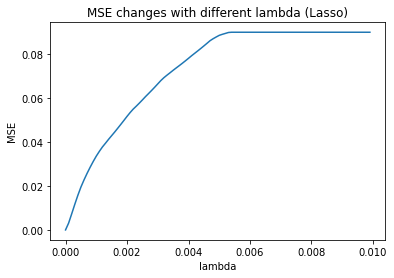

In [43]:
mse = []
x_axis = []
for i in range(0,100,1):
    lasso = Lasso(alpha = i/10000,normalize = True)
    lasso.fit(X, y)
    mse.append(np.mean((lasso.predict(X) - y) ** 2)) 
    x_axis.append(i/10000)
plt.xlabel("lambda")
plt.ylabel("MSE")
plt.title("MSE changes with different lambda (Lasso)")
plt.plot(x_axis,mse)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=5.05953e-19): result may not be accurate.
  overwrite_a=False)


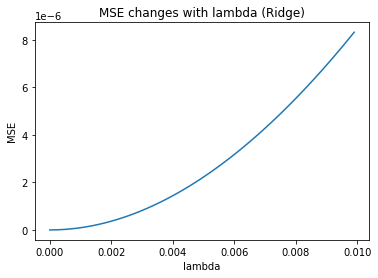

In [44]:
mse = []
x_axis = []
for i in range(0,100,1):
    ridge = Ridge(alpha = i/10000,normalize = True)
    ridge.fit(X, y)
    mse.append(np.mean((ridge.predict(X) - y) ** 2)) 
    x_axis.append(i/10000)
plt.xlabel("lambda")
plt.ylabel("MSE")
plt.title("MSE changes with lambda (Ridge)")
plt.plot(x_axis,mse)

### **Q1 (b)**

In [45]:
lasso = Lasso(alpha = 0.001,normalize = True)
lasso.fit(X, y)
n = np.sum(lasso.coef_ != 0)
print('The total pixels were chosen from Lasso Regression：' + str(n))

important_pixels = []
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] != 0:
        important_pixels.append(i)

The total pixels were chosen from Lasso Regression：52


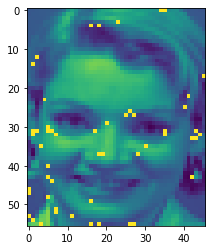

In [46]:
image = Image.open(r"/Users/4yo/Desktop/NTU_Class/Data_Analyze_Method/ORL_Faces/1_1.png")
img_array = np.array(image)
#print(len(important_pixels),"important pixels at")
for i in range(0, len(important_pixels)): #math.floor()
    col = math.floor(important_pixels[i]/46)
    row = important_pixels[i]-46*col    
    img_array[int(col)][int(row)]=255
plt.imshow(img_array, interpolation='nearest')
plt.show()

### **Q2 (a)**

In [35]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

In [36]:
# Read the CSV file
data = pd.read_csv('/Users/4yo/Desktop/NTU_Class/Data_Analyze_Method/transportation_table.csv')

# Define the objective function to minimize
def objective(beta, data):
    K = data['Capital']
    L = data['Labor']
    V = data['Value_Added']
    epsilon = np.exp(np.random.normal(size=len(data)))
    log_V_hat = np.log(beta[0]) + beta[1]*np.log(K) + beta[2]*np.log(L) + np.log(epsilon)
    return np.sum((np.log(V) - log_V_hat)**2)

# Minimize the objective function to estimate beta
beta0 = np.array([10000, 0.5, 0.5])
result = minimize(objective, beta0, args=(data,), method='Nelder-Mead')

# Print the estimated parameters
print('Estimates under the unconstrained model:')
print('beta1 =', result.x[1])
print('beta2 =', result.x[2])

Estimates under the unconstrained model:
beta1 = 0.48739662520549115
beta2 = 0.45689725685502514


### **Q2 (b)**

In [38]:
# Define the objective function with the Cobb-Douglas constraint
def objective_cd(beta, data):
    K = data['Capital']
    L = data['Labor']
    V = data['Value_Added']
    epsilon = np.exp(np.random.normal(size=len(data)))
    log_V_hat = np.log(beta[0]) + beta[1]*np.log(K) + (1-beta[1])*np.log(L) + np.log(epsilon)
    return np.sum((np.log(V) - log_V_hat)**2)

# Minimize the objective function with the Cobb-Douglas constraint to estimate beta
beta0 = np.array([10000, 0.5])
bounds = ((None, None), (0, 1))
result = minimize(objective_cd, beta0, args=(data,), method='L-BFGS-B', bounds=bounds)

# Print the estimated parameters under the Cobb-Douglas constraint
print('Estimates under the Cobb-Douglas constraint:')
print('beta1 =', result.x[1])
print('beta2 =', 1-result.x[1])

Estimates under the Cobb-Douglas constraint:
beta1 = 0.5000000000000004
beta2 = 0.49999999999999956


/Users/4yo/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


### **Q3 (a)**

In [19]:
import numpy as np

def pca(X, isCorrMX=False):
    """
    Performs PCA on the input data matrix X.

    Parameters:
    X: array-like, shape (n_samples, n_features)
        The input data matrix, where n_samples is the number of samples and
        n_features is the number of features.

    isCorrMX: bool, default False
        If True, use the correlation matrix to perform PCA. Otherwise, use the
        covariance matrix.

    Returns:
    loadings: array-like, shape (n_features, n_components)
        The loading matrix, where n_components is the number of principal
        components.

    eigenvalues: array-like, shape (n_components,)
        The eigenvalue vector of the principal components.

    scores: array-like, shape (n_samples, n_components)
        The score matrix, i.e. the matrix of principal components.

    cum_var: array-like, shape (n_components,)
        The cumulative variance explained by each principal component.
    """
    # center the data
    X_centered = X - np.mean(X, axis=0)

    # compute the covariance/correlation matrix
    if isCorrMX:
        cov_matrix = np.corrcoef(X_centered, rowvar=False)
    else:
        cov_matrix = np.cov(X_centered, rowvar=False)

    # perform eigendecomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

    # sort eigenvalues and eigenvectors in decreasing order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # compute the loading matrix
    loadings = eigenvectors

    # compute the score matrix
    scores = np.dot(X_centered, loadings)

    # compute the cumulative variance explained
    cum_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
    var_exp = eigenvalues / np.sum(eigenvalues)
    cum_var_exp = np.cumsum(var_exp)

        # plot the scree plot
    import matplotlib.pyplot as plt
    plt.bar(range(1, len(eigenvalues)+1), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(1, len(eigenvalues)+1), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.show()

    return loadings, eigenvalues, scores, cum_var

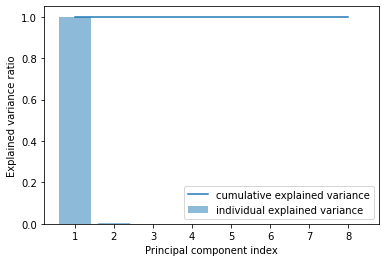

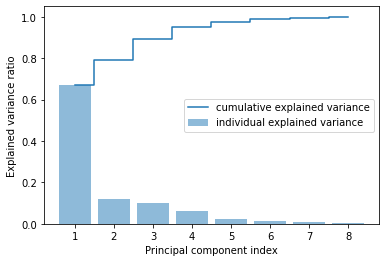

In [20]:
import pandas as pd

# load AutoMPG dataset
auto_mpg = pd.read_csv("DA_Demo.csv")

# extract features and labels
X = auto_mpg.iloc[:, :-1].values

# perform PCA with covariance matrix
loadings_cov, eigenvalues_cov, scores_cov, cum_var_cov = pca(X, isCorrMX=False)

# perform PCA with correlation matrix
loadings_corr, eigenvalues_corr, scores_corr, cum_var_corr = pca(X, isCorrMX=True)

In [18]:
# print results
print("\nisCorrMX=False: \n")
print("Loading matrix with covariance matrix:\n", loadings_cov)
print("Eigenvalues with covariance matrix:\n", eigenvalues_cov)
print("Score matrix with covariance matrix:\n", scores_cov)
print("Cumulative variance explained with covariance matrix:\n", cum_var_cov)


isCorrMX=False: 

Loading matrix with covariance matrix:
 [[-7.59590581e-03 -1.75785097e-02 -4.19212264e-02  8.31000630e-01
   5.49535507e-01  5.61451547e-02 -3.97118180e-02  2.43984110e-02]
 [ 1.79257460e-03  1.33223878e-02 -7.28065126e-03 -4.31502411e-03
  -9.17751826e-03  1.53912563e-02  3.75218753e-01  9.26626917e-01]
 [ 1.14338202e-01  9.45572572e-01 -3.03873075e-01  9.22239231e-03
  -3.41321063e-03 -1.06909276e-02  9.19061696e-04 -1.63889805e-02]
 [ 3.89660894e-02  2.98328518e-01  9.47540130e-01  6.34424404e-02
  -5.73169239e-03 -8.63249865e-02 -8.51000586e-03  8.19890724e-03]
 [ 9.92644743e-01 -1.20867105e-01 -2.65874637e-03  3.53993832e-03
   3.93041220e-03  3.52931159e-03 -1.85727735e-04 -1.31438408e-04]
 [-1.35281211e-03 -3.48299933e-02 -7.68839939e-02 -2.08463123e-02
   1.25527681e-01 -9.88134411e-01  9.09879495e-03  1.37739900e-02]
 [-1.33689886e-03 -2.39497354e-02 -4.41269251e-02  5.51778482e-01
  -8.24191632e-01 -1.12006207e-01  3.03888666e-02 -1.60382361e-02]
 [-5.51527

In [15]:
print("\nisCorrMX=True \n")
print("Loading matrix with correlation matrix:\n", loadings_corr)
print("Eigenvalues with correlation matrix:\n", eigenvalues_corr)
print("Score matrix with correlation matrix:\n", scores_corr)
print("Cumulative variance explained with correlation matrix:\n", cum_var_corr)


isCorrMX=True 

Loading matrix with correlation matrix:
 [[-0.38586239  0.07663269  0.29228579  0.09998251 -0.74036644 -0.38735165
   0.19588516  0.1151321 ]
 [ 0.4023885   0.13842878  0.07223935 -0.21603551 -0.48261485  0.53092548
  -0.27878265  0.41774679]
 [ 0.41644435  0.12632499  0.07423622 -0.13581398 -0.30331627  0.00699705
   0.08422855 -0.82916553]
 [ 0.40183594 -0.11148007  0.23605571 -0.11971643  0.08426839 -0.6667096
  -0.53504996  0.13477548]
 [ 0.40157579  0.21102    -0.00089399 -0.32246785  0.13127292 -0.23585961
   0.72202073  0.30991105]
 [-0.2647309   0.41690206 -0.63943514 -0.49280794 -0.09773197 -0.20293343
  -0.22891382 -0.03518826]
 [-0.21386777  0.6904632   0.5871892  -0.10601968  0.30134385  0.11002592
  -0.12501506 -0.0542884 ]
 [-0.27786815 -0.50150064  0.30732382 -0.74328281  0.04739508  0.12086663
   0.0345266  -0.07951102]]
Eigenvalues with correlation matrix:
 [5.3758723  0.94366326 0.81164365 0.48615594 0.18282657 0.11432193
 0.05354682 0.03196954]
Score

### **Q3 (b)**

### **Q4 (a)**

### **Q4 (b)**